In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
dbDiabetes = pd.read_csv('datos/diabetes.csv')

In [3]:
dbDiabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
dbDiabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [5]:
#sns.pairplot(dbDiabetes)

In [6]:
dbDiabetes.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


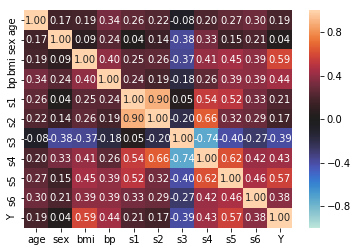

In [7]:
sns.heatmap(dbDiabetes.corr(),  vmin=-1, vmax=1, center=0, annot=True, fmt=".2f")

In [8]:
X = dbDiabetes[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = dbDiabetes['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
predictions = lm.predict(X_test)

In [10]:
mean_squared_error(predictions, Y_test)

3281.1828369168934

In [11]:
lm = LinearRegression()

In [12]:
X = dbDiabetes[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = dbDiabetes['Y']
cross_val_score(lm, X, Y, cv=20).mean()

0.40934885187416903

In [13]:
X = dbDiabetes[['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = dbDiabetes['Y']
cross_val_score(lm, X, Y, cv=20).mean()

0.392756599604992

In [14]:
X = dbDiabetes[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = dbDiabetes['Y']
cross_val_score(lm, X, Y, cv=20).mean()

0.3960390535427453

In [15]:
X = dbDiabetes[['age', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = dbDiabetes['Y']
cross_val_score(lm, X, Y, cv=20).mean()

0.3701601569546148

In [16]:
X = dbDiabetes[['s1', 's2', 's3', 's4', 's5', 's6']]
Y = dbDiabetes['Y']
cross_val_score(lm, X, Y, cv=20).mean()

0.2694879928230933

2 0.10038573560482948
3 0.1895914978195579
4 0.2749154290717044
5 0.26215095700766167
6 0.2932695578514606
7 0.3032914712356935
8 0.3107131894691686
9 0.32522419041491696
10 0.32842756455524336
11 0.33577401478385255
12 0.3407754346728228
13 0.34754779479825576
14 0.35422919226981386
15 0.36197400179107897
16 0.3698695593848103
17 0.36891188338834197
18 0.376568679620774
19 0.3680920315745595
20 0.3712592104236068
21 0.36774870903343493
22 0.3597897873584702
23 0.36066363838916493
24 0.36685588506973466
25 0.36843348199952863
26 0.3693279471102751
27 0.36820790372616885
28 0.3669548710179172
29 0.36670425428264536
30 0.3652117605910798
31 0.37087246829308007
32 0.3716493435597973
33 0.3689258516654303
34 0.3650443379398243
35 0.36593051418307393
36 0.36432318655883417
37 0.3590900145308654
38 0.3600060698925529
39 0.36115086104594096
40 0.362705881987556
41 0.365111554757325
42 0.36604077611159597
43 0.3648758024287413
44 0.3662816467177966
45 0.36499579863628023
46 0.3614615107790123


[0, 50, 0, 0.426568679620774]

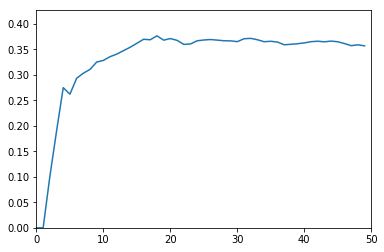

In [17]:
X = dbDiabetes[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = dbDiabetes['Y']
knnValues = [0, 0]
for i in range(2, 50):
    knnr = KNeighborsRegressor(n_neighbors=i)
    t = cross_val_score(knnr, X, Y, cv=20).mean()
    knnValues.append(t)
    print(i, t)
plt.plot(knnValues)
plt.axis([0, len(knnValues), min(knnValues), max(knnValues)+.05])


In [18]:
lr = LogisticRegression()
X = dbDiabetes[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = dbDiabetes['Y']
cross_val_score(lr, X, Y, cv=6).mean()


C:\Users\Larry\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


0.16318433800423135

As we can see, the best score I achieved was 0.409 using all the parameters